# Question 2

Microsoft called us for help. They built a studio and would like to start producing movies. They're asking what the best films are and how they can make great films. Using provided data, we will give our best recommendations. 

# Does release date impact profit?

### Let's start by importing our data. 

In [1]:
import patoolib
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls

CONTRIBUTING.md
LICENSE.md
Project Cleaning Rotten Tomatoes Only.ipynb
Project Cleaning.ipynb
Question 1.ipynb
Question 2 .ipynb
Question 3.ipynb
Question 4.ipynb
README.md
awesome.gif
data
project_pdf_submission.gif
repo_pdf.gif
video_recording_submission.gif
zippedData


In [3]:
cd\zippedData

/Users/jaklynsoler/flatiron/class-material/section01/PROJECT_ONE/dsc-phase-1-project-online-master/zippedData


In [4]:
cd\unzipped

/Users/jaklynsoler/flatiron/class-material/section01/PROJECT_ONE/dsc-phase-1-project-online-master/zippedData/unzipped


This snippet below will allow us to view up to 100 rows of data without it being truncated. 

In [7]:
pd.options.display.max_rows = 100

### It looks like the movie_budgets dataframe below will allow us to calculate profit by release date. 

In [8]:
movie_budgets = pd.read_csv('tn.movie_budgets.csv')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### First, we will select the columns of the dataframe that we want to keep.

In [11]:
movie_budgets = movie_budgets[['movie', 'production_budget', 'domestic_gross', 'worldwide_gross', 'release_date']]

### Let's format the release dates.

In [12]:
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'],
                                            format = '%b %d, %Y')

### We will add another column to sort the data by the day of the week. 

In [13]:
movie_budgets['release_day_of_week'] = pd.to_datetime(movie_budgets['release_date']).dt.strftime('%w')

### We will add one more column to sort the data by the week of the year.

In [15]:
movie_budgets['release_week'] = pd.to_datetime(movie_budgets['release_date']).dt.strftime('%W')

### ... And the last column will be for understanding the release year. 

In [16]:
movie_budgets['release_year'] = pd.to_datetime(movie_budgets['release_date']).dt.strftime('%Y')

In [17]:
movie_budgets.head()

,movie,production_budget,domestic_gross,worldwide_gross,release_date,release_day_of_week,release_week,release_year
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009-12-18,5,50,2009
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011-05-20,5,20,2011
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019-06-07,5,22,2019
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015-05-01,5,17,2015
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017-12-15,5,50,2017


### Let's take a look at the day of the week where most movies are released.

For day of the week, 0 represents Sunday. As we can see from our value counts, the vast majority of movies are released on Friday. That being said, I would assume that is because the rest of the industry already knows that Friday is the best day of the week for a movie release.

In [20]:
movie_budgets['release_day_of_week'].value_counts()
# 0 is Sunday

5    4539
3     621
2     290
4     172
1      59
6      56
0      45
Name: release_day_of_week, dtype: int64

### Now, back to the profits! Let's whip those dollar values into shape. 

We will remove the commas and dollar signs so that we can put the values into mathematical equations. 

In [22]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(',', '')
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace(',', '')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace(',', '')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$', '')
movie_budgets['production_budget'].astype(float)
movie_budgets['domestic_gross'].astype(float)
movie_budgets['worldwide_gross'].astype(float)

0       2.776345e+09
1       1.045664e+09
2       1.497624e+08
3       1.403014e+09
4       1.316722e+09
            ...     
5777    0.000000e+00
5778    2.404950e+05
5779    1.338000e+03
5780    0.000000e+00
5781    1.810410e+05
Name: worldwide_gross, Length: 5782, dtype: float64

### Hmm.. It looks like we have a few zeros to get rid of in the worldwide gross column.

In [23]:
movie_budgets['worldwide_gross'].value_counts()

0            367
8000000        9
7000000        6
2000000        6
5000000        4
            ... 
49238525       1
82497035       1
302710615      1
7719630        1
60772856       1
Name: worldwide_gross, Length: 5356, dtype: int64

### We're going to delete the rows that have a zero by converting them to NaN values, and deleting them.

In [25]:
for cell in movie_budgets.columns:
    movie_budgets['worldwide_gross'].replace('0', np.nan, inplace=True)

In [26]:
movie_budgets.dropna(inplace = True)

### Nice! That did the trick. 

In [28]:
movie_budgets['worldwide_gross'].value_counts()

8000000      9
7000000      6
2000000      6
5000000      4
11000000     4
            ..
49238525     1
82497035     1
302710615    1
7719630      1
60772856     1
Name: worldwide_gross, Length: 5355, dtype: int64

### Time to calculate the profit! 
We're adding a new column called profit which will be the difference between the worldwide gross and the production budget columns. 

In [30]:
movie_budgets['profit'] = movie_budgets['worldwide_gross'].astype(float).diff(periods=2)

In [31]:
movie_budgets.head()

,movie,production_budget,domestic_gross,worldwide_gross,release_date,release_day_of_week,release_week,release_year,profit
0,Avatar,425000000,760507625,2776345279,2009-12-18,5,50,2009,NaN
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011-05-20,5,20,2011,NaN
2,Dark Phoenix,350000000,42762350,149762350,2019-06-07,5,22,2019,-2.626583e+09
3,Avengers: Age of Ultron,330600000,459005868,1403013963,2015-05-01,5,17,2015,3.573501e+08
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017-12-15,5,50,2017,1.166959e+09


### Since the two first values didn't populate, we will go ahead and add those in now. 

In [34]:
movie_budgets['profit'][0] = 2351345279

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
movie_budgets['profit'][1] = 635063875

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
movie_budgets.head()

,movie,production_budget,domestic_gross,worldwide_gross,release_date,release_day_of_week,release_week,release_year,profit
0,Avatar,425000000,760507625,2776345279,2009-12-18,5,50,2009,2.351345e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011-05-20,5,20,2011,6.350639e+08
2,Dark Phoenix,350000000,42762350,149762350,2019-06-07,5,22,2019,-2.626583e+09
3,Avengers: Age of Ultron,330600000,459005868,1403013963,2015-05-01,5,17,2015,3.573501e+08
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017-12-15,5,50,2017,1.166959e+09


### Great! Now, let's see if there are any other NaN values!

In [37]:
movie_budgets['profit'].isna().sum()

0

In [39]:
movie_budgets['domestic_gross'].isna().sum()

0

In [40]:
movie_budgets['production_budget'].isna().sum()

0

### Let's convert the profit and production budget columns to integers in order to calculate a profit quotient.

In [42]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype(int)

In [43]:
movie_budgets['profit'] = movie_budgets['profit'].map(int)

### We are going to divide profit by budget and multiply by 100 to determine profit margin.

In [44]:
movie_budgets['profit_percentage'] = (movie_budgets.profit / movie_budgets.production_budget) * 100

In [45]:
movie_budgets.head()

,movie,production_budget,domestic_gross,worldwide_gross,release_date,release_day_of_week,release_week,release_year,profit,profit_percentage
0,Avatar,425000000,760507625,2776345279,2009-12-18,5,50,2009,2351345279,553.257713
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011-05-20,5,20,2011,635063875,154.667286
2,Dark Phoenix,350000000,42762350,149762350,2019-06-07,5,22,2019,-2626582929,-750.452265
3,Avengers: Age of Ultron,330600000,459005868,1403013963,2015-05-01,5,17,2015,357350088,108.091376
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017-12-15,5,50,2017,1166959397,368.125993


### Now, we can find the profit margin average sorted by day of the week. 

In [46]:
profit_by_day = movie_budgets.groupby('release_day_of_week').profit_percentage.mean()

In [47]:
profit_by_day

release_day_of_week
0    269.383013
1   -339.587714
2    219.798810
3     30.368883
4    455.053859
5    -26.563428
6   -686.465750
Name: profit_percentage, dtype: float64

We have already determined that most films are released on Friday so our data around day of the week is now a mute point. Let's continue by investigating release year and week of the year. 

### Let's go ahead and convert our release year column to an integer

In [50]:
movie_budgets['release_year'] = movie_budgets['release_year'].map(int)

### We're restricting our data to only include movies that were released after the year 2000.

In [51]:
for val in movie_budgets.release_year: 
    if val < 2000:
        movie_budgets['release_year'].replace(val, np.nan, inplace=True)

In [52]:
movie_budgets.dropna(inplace = True)

### Now we can evaluate profit margins by the week of release. 

In [57]:
profit_by_week = movie_budgets.groupby('release_week').profit_percentage.mean()

In [58]:
profit_by_week = profit_by_week.to_frame()

In [59]:
profit_by_week

,profit_percentage
release_week,
00,102.018866
01,306.782943
02,-2638.058400
03,-102.526264
04,-651.708750
05,-72.455916
06,-89.970563
07,-53.588925
08,27.134423


### It looks like week 2 is an extremely low week, but that doesn't make sense, does it?
Let's access week 2 and remove some outliers to further investigate.

In [63]:
profit_by_week.reset_index(inplace=True)

When are most movies released?

In [79]:
profit_by_week.head()

,index,release_week,profit_percentage
0,0,00,102.018866
1,1,01,306.782943
2,2,02,-2638.058400
3,3,03,-102.526264
4,4,04,-651.708750


In [82]:
movie_budgets['release_week'].value_counts()

51    123
40    106
52    103
42     99
38     98
41     96
37     95
39     94
50     88
33     88
47     87
15     86
10     84
6      83
32     82
17     82
11     82
36     80
49     80
45     80
46     79
13     78
34     77
29     77
16     77
14     77
31     75
28     75
12     74
24     73
44     73
18     72
7      72
30     72
43     72
25     70
23     69
22     68
4      68
2      68
3      68
9      68
8      67
5      66
19     66
26     65
27     65
21     64
20     63
35     63
48     48
1      44
53      8
0       8
Name: release_week, dtype: int64

In [65]:
movie_budgets['release_week'] = movie_budgets['release_week'].astype(int)

In [68]:
movie_budgets[movie_budgets['release_week'] == 2]

,movie,production_budget,domestic_gross,worldwide_gross,release_date,release_day_of_week,release_week,release_year,profit,profit_percentage
280,Monster Trucks,125000000,33370166,61642798,2017-01-13,5,2,2017.0,-150213290,-120.170632
328,The Green Hornet,110000000,98780042,229155503,2011-01-14,5,2,2011.0,20784611,18.895101
563,The Book of Eli,80000000,94835059,158750817,2010-01-15,5,2,2010.0,-46023873,-57.529841
605,Arthur et les Minimoys,80000000,15132763,113325743,2007-01-12,5,2,2007.0,92484620,115.605775
724,The Dilemma,70000000,48475290,70546865,2011-01-14,5,2,2011.0,16303740,23.291057
746,Blackhat,70000000,8005980,19665004,2015-01-16,5,2,2015.0,6068093,8.668704
811,Elektra,65000000,24409722,56824633,2005-01-14,5,2,2005.0,-1720907,-2.647549
877,Kangaroo Jack,60000000,66723216,90723216,2003-01-17,5,2,2003.0,-74325012,-123.875020
896,Jack Ryan: Shadow Recruit,60000000,50577412,131377412,2014-01-17,5,2,2014.0,17915885,29.859808
940,Supernova,60000000,14218868,14816494,2000-01-14,5,2,2000.0,-5725174,-9.541957


### It looks like the movie The Terrorist at -179219 is skewing the data for week 2. 

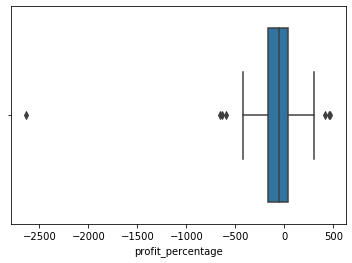

In [69]:
sns.boxplot(x=profit_by_week['profit_percentage'])

In [70]:
Q1 = profit_by_week.quantile(0.25)
Q3 = profit_by_week.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

index                 26.500000
profit_percentage    204.156459
dtype: float64


In [71]:
print(profit_by_week < (Q1 - 1.5 * IQR)) or (profit_by_week > (Q3 + 1.5 * IQR))

    index  profit_percentage  release_week
0   False              False         False
1   False              False         False
2   False               True         False
3   False              False         False
4   False               True         False
5   False              False         False
6   False              False         False
7   False              False         False
8   False              False         False
9   False              False         False
10  False              False         False
11  False              False         False
12  False              False         False
13  False               True         False
14  False              False         False
15  False              False         False
16  False              False         False
17  False              False         False
18  False              False         False
19  False              False         False
20  False              False         False
21  False              False         False
22  False  

,index,profit_percentage,release_week
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [72]:
profit_by_week_out = profit_by_week[~((profit_by_week < (Q1 - 1.5 * IQR)) | (profit_by_week > (Q3 + 1.5 * IQR))).any(axis=1)]
profit_by_week_out.shape

(47, 3)

In [75]:
profit_by_week_out.head()

,index,release_week,profit_percentage
0,0,00,102.018866
1,1,01,306.782943
3,3,03,-102.526264
5,5,05,-72.455916
6,6,06,-89.970563


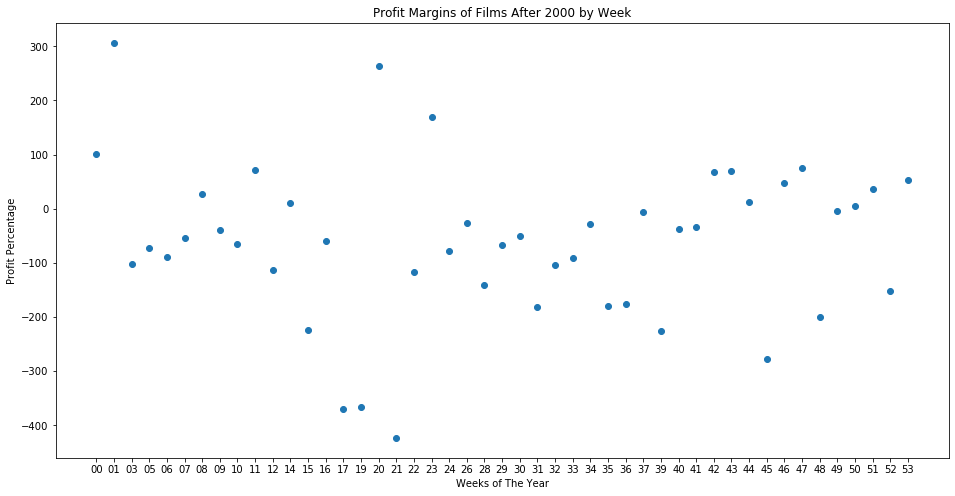

In [77]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(profit_by_week_out['release_week'], profit_by_week_out['profit_percentage'])
ax.set_xlabel('Weeks of The Year')
ax.set_ylabel('Profit Percentage')
plt.title('Profit Margins of Films After 2000 by Week')
plt.show()

# Conclusion

We did not find a significant correlation between the week of release and profit margin. We also did not find a significant correlation between the day of release and the profit margin. However, we did find that most movies are released on Fridays and in the last 2 weeks of the year. 
This is happening to meet the human action of watching movies at the end of the week and the end of the year during the winter holiday. 
In conclusion, I would recommend that Microsoft follow suit with thier fellow studios.